In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import importlib

from scipy.stats import norm

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score


In [2]:
import pydotplus
from sklearn import tree
from IPython.display import Image
import graphviz

In [3]:
import os
os.environ['PATH'] += os.pathsep + 'C:/Users/Asia/Anaconda3/Library/bin/graphviz'

In [4]:
df = pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\dataframe_dimensionality_reduction.csv',  header=0, parse_dates=True, squeeze=True)

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hours,Office_Hours,Working_day,Time_blocks_0,...,Temperature/HumidityRatio,Humidity/CO2,Humidity/Temperature,Humidity/HumidityRatio,HumidityRatio/Humidity,HumidityRatio/Temperature,HumidityRatio/CO2,CO2/Temperature,CO2/Humidity,CO2/HumidityRatio
0,23.7000,26.272,585.200000,749.200000,0.004764,1,14,1,1,0,...,4974.640851,0.035067,1.108523,5514.504828,0.000181,0.000201,0.000006,31.611814,28.517052,157257.423014
1,23.7180,26.290,578.400000,760.400000,0.004773,1,14,1,1,0,...,4969.554728,0.034574,1.108441,5508.457450,0.000182,0.000201,0.000006,32.060039,28.923545,159324.117354
2,23.7300,26.230,572.666667,769.666667,0.004765,1,14,1,1,0,...,4979.903526,0.034080,1.105352,5504.545702,0.000182,0.000201,0.000006,32.434331,29.342991,161519.837653
3,23.7225,26.125,493.750000,774.750000,0.004744,1,14,1,1,0,...,5000.765892,0.033721,1.101275,5507.219262,0.000182,0.000200,0.000006,32.658868,29.655502,163319.353995
4,23.7540,26.200,488.600000,779.000000,0.004767,1,14,1,1,0,...,4983.432615,0.033633,1.102972,5496.587291,0.000182,0.000201,0.000006,32.794477,29.732824,163429.064863


**CLASSIFICAZIONE**

In [6]:
class_name = 'Occupancy'
columns2remove = ['Hours']
df.drop(columns2remove, inplace=True, axis=1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Office_Hours,Working_day,Time_blocks_0,Time_blocks_1,...,Temperature/HumidityRatio,Humidity/CO2,Humidity/Temperature,Humidity/HumidityRatio,HumidityRatio/Humidity,HumidityRatio/Temperature,HumidityRatio/CO2,CO2/Temperature,CO2/Humidity,CO2/HumidityRatio
0,23.7000,26.272,585.200000,749.200000,0.004764,1,1,1,0,0,...,4974.640851,0.035067,1.108523,5514.504828,0.000181,0.000201,0.000006,31.611814,28.517052,157257.423014
1,23.7180,26.290,578.400000,760.400000,0.004773,1,1,1,0,0,...,4969.554728,0.034574,1.108441,5508.457450,0.000182,0.000201,0.000006,32.060039,28.923545,159324.117354
2,23.7300,26.230,572.666667,769.666667,0.004765,1,1,1,0,0,...,4979.903526,0.034080,1.105352,5504.545702,0.000182,0.000201,0.000006,32.434331,29.342991,161519.837653
3,23.7225,26.125,493.750000,774.750000,0.004744,1,1,1,0,0,...,5000.765892,0.033721,1.101275,5507.219262,0.000182,0.000200,0.000006,32.658868,29.655502,163319.353995
4,23.7540,26.200,488.600000,779.000000,0.004767,1,1,1,0,0,...,4983.432615,0.033633,1.102972,5496.587291,0.000182,0.000201,0.000006,32.794477,29.732824,163429.064863


In [7]:
df.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy',
       'Office_Hours', 'Working_day', 'Time_blocks_0', 'Time_blocks_1',
       'Time_blocks_2', 'Time_blocks_3', 'Light/Temperature', 'Light/Humidity',
       'Light/CO2', 'Light/HumidityRatio', 'Temperature/CO2',
       'Temperature/Humidity', 'Temperature/HumidityRatio', 'Humidity/CO2',
       'Humidity/Temperature', 'Humidity/HumidityRatio',
       'HumidityRatio/Humidity', 'HumidityRatio/Temperature',
       'HumidityRatio/CO2', 'CO2/Temperature', 'CO2/Humidity',
       'CO2/HumidityRatio'],
      dtype='object')

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Light/Temperature', 'Light/Humidity',
           'Light/CO2', 'Light/HumidityRatio', 'Temperature/CO2','Temperature/Humidity', 'Temperature/HumidityRatio',
           'Humidity/CO2', 'Humidity/Temperature', 'Humidity/HumidityRatio', 'HumidityRatio/Humidity',
           'HumidityRatio/Temperature', 'HumidityRatio/CO2', 'CO2/Temperature', 'CO2/Humidity','CO2/HumidityRatio']
scaler.fit(np.array(df[columns]))
df[columns] = scaler.transform(np.array(df[columns]))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
#Normalizzazione
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(df.values)

In [13]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Office_Hours,Working_day,Time_blocks_0,Time_blocks_1,...,Temperature/HumidityRatio,Humidity/CO2,Humidity/Temperature,Humidity/HumidityRatio,HumidityRatio/Humidity,HumidityRatio/Temperature,HumidityRatio/CO2,CO2/Temperature,CO2/Humidity,CO2/HumidityRatio
0,0.869029,0.418677,0.344793,0.202224,0.549737,1,1,1,0,0,...,0.344612,0.334725,0.293219,0.110897,0.851950,0.451012,0.480619,0.155479,0.248921,0.162616
1,0.872357,0.419468,0.340787,0.208956,0.551972,1,1,1,0,0,...,0.343482,0.327208,0.293155,0.107986,0.855677,0.452252,0.471543,0.161024,0.255321,0.167632
2,0.874576,0.416831,0.337409,0.214525,0.549997,1,1,1,0,0,...,0.345781,0.319670,0.290775,0.106104,0.858092,0.449732,0.462155,0.165654,0.261926,0.172961
3,0.873190,0.412217,0.290912,0.217581,0.544374,1,1,1,0,0,...,0.350416,0.314193,0.287633,0.107391,0.856441,0.444683,0.454649,0.168432,0.266847,0.177329
4,0.879014,0.415513,0.287877,0.220135,0.550376,1,1,1,0,0,...,0.346565,0.312855,0.288941,0.102274,0.863016,0.448875,0.454196,0.170109,0.268065,0.177595


In [8]:
#from sklearn.model_selection import RepeatedKFold 

#attributes = [col for col in df.columns if col != class_name]
#X = df[attributes].values
#y = df[class_name]

#kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

#for train_index, test_index in kf.split(X):
#      print("Train:", train_index, "Validation:",test_index)
#      X_train, X_test = X[train_index], X[test_index] 
#      y_train, y_test = y[train_index], y[test_index]

In [14]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [15]:
X_train.shape, X_test.shape

((14392, 27), (6168, 27))

In [16]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy 0.9901102464332037
F1-score [0.99357421 0.97854379]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4743
           1       0.98      0.98      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



array([[4716,   27],
       [  34, 1391]], dtype=int64)

Accuracy: 0.9240 (+/- 0.14)
F1-score: 0.8943 (+/- 0.20)
0.9852238756283499


**Random Search**

In [17]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [18]:
#exhaustively considers all parameter combinations
param_list = {'max_depth': [None] + list(np.arange(2, 50)),
              'min_samples_split': [2, 5, 10, 15, 20, 30, 50, 100, 150],
              'min_samples_leaf': [1, 5, 10, 15, 20, 30, 50, 100, 150],
              'criterion': ['gini', 'entropy'],
              'random_state': [42]
             }
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=100) #is doing at the same time randomized search and cross-validation
random_search.fit(X, y)
clf = random_search.best_estimator_

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
       

In [19]:
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.989 (std: 0.009)
Parameters: {'random_state': 42, 'min_samples_split': 30, 'min_samples_leaf': 150, 'max_depth': 24, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.989 (std: 0.009)
Parameters: {'random_state': 42, 'min_samples_split': 10, 'min_samples_leaf': 150, 'max_depth': 30, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.989 (std: 0.009)
Parameters: {'random_state': 42, 'min_samples_split': 5, 'min_samples_leaf': 30, 'max_depth': 4, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.989 (std: 0.009)
Parameters: {'random_state': 42, 'min_samples_split': 50, 'min_samples_leaf': 150, 'max_depth': 18, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.989 (std: 0.009)
Parameters: {'random_state': 42, 'min_samples_split': 5, 'min_samples_leaf': 150, 'max_depth': 19, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.989 (std: 0.009)
Parameters: {

**Decision Tree**

In [22]:
clf_1 = DecisionTreeClassifier(criterion='entropy', max_depth= 10, 
                             min_samples_split=150, min_samples_leaf=150, random_state=42)
clf_1.fit(X_train, y_train)

y_pred_1 = clf_1.predict(X_test)


print('Accuracy %s' % accuracy_score(y_test, y_pred_1))
print('F1-score %s' % f1_score(y_test, y_pred_1, average=None))
print(classification_report(y_test, y_pred_1))
confusion_matrix(y_test, y_pred_1)

scores = cross_val_score(clf_1, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf_1, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#ROC
fpr_1, tpr_1, _ = roc_curve(y_test, y_pred_1)
roc_auc_1 = auc(fpr_1, tpr_1)
print(roc_auc_1)

roc_auc_1 = roc_auc_score(y_test, y_pred_1, average=None)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Accuracy 0.9892996108949417
F1-score [0.99300403 0.97725706]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.96      1.00      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



array([[4684,   59],
       [   7, 1418]], dtype=int64)

Accuracy: 0.9893 (+/- 0.02)
F1-score: 0.9854 (+/- 0.03)
0.9913241674711764


In [26]:
clf_2 = DecisionTreeClassifier(criterion='entropy',
                               max_depth=5, min_samples_split=100, min_samples_leaf=100, random_state=42)
clf_2.fit(X_train, y_train)

y_pred_2 = clf_2.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_2))
print('F1-score %s' % f1_score(y_test, y_pred_2, average=None))
print(classification_report(y_test, y_pred_2))

scores = cross_val_score(clf_2, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf_2, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#ROC
fpr_2, tpr_2, _ = roc_curve(y_test, y_pred_2)
roc_auc_2 = auc(fpr_2, tpr_2)
print(roc_auc_2)

roc_auc_2 = roc_auc_score(y_test, y_pred_2, average=None)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Accuracy 0.9892996108949417
F1-score [0.99300403 0.97725706]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.96      1.00      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

Accuracy: 0.9893 (+/- 0.02)
F1-score: 0.9854 (+/- 0.03)
0.9913241674711764


In [30]:
clf_3 = DecisionTreeClassifier(criterion='entropy',
                               max_depth=30, min_samples_split=10, min_samples_leaf=150, random_state=42)
clf_3.fit(X_train, y_train)

y_pred_3 = clf_3.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_3))
print('F1-score %s' % f1_score(y_test, y_pred_3, average=None))
print(classification_report(y_test, y_pred_3))

scores = cross_val_score(clf_3, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf_3, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

#ROC
fpr_3, tpr_3, _ = roc_curve(y_test, y_pred_3)
roc_auc_3 = auc(fpr_3, tpr_3)
print(roc_auc_3)

roc_auc_3 = roc_auc_score(y_test, y_pred_3, average=None)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy 0.9892996108949417
F1-score [0.99300403 0.97725706]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.96      1.00      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168

Accuracy: 0.9893 (+/- 0.02)
F1-score: 0.9854 (+/- 0.03)
0.9913241674711764


In [40]:
#Features importance, the higher the more important the features
for col, imp in zip(attributes, clf_1.feature_importances_):
    print(col, imp)

Temperature 0.0
Humidity 0.008309114378903897
Light 0.005365916872932564
CO2 0.0023656551945779158
HumidityRatio 0.0038463546646088434
Office_Hours 0.0
Working_day 0.0
Time_blocks_0 0.0
Time_blocks_1 0.0
Time_blocks_2 0.0
Time_blocks_3 0.0
Light/Temperature 0.968921159721034
Light/Humidity 0.0
Light/CO2 0.0035607597694247836
Light/HumidityRatio 0.0
Temperature/CO2 0.00014991743569812472
Temperature/Humidity 0.0
Temperature/HumidityRatio 0.0011552564850417046
Humidity/CO2 0.003735696874539219
Humidity/Temperature 0.0
Humidity/HumidityRatio 0.0
HumidityRatio/Humidity 0.0
HumidityRatio/Temperature 0.0
HumidityRatio/CO2 0.0
CO2/Temperature 0.00168303783535514
CO2/Humidity 0.0009071307678839223
CO2/HumidityRatio 0.0


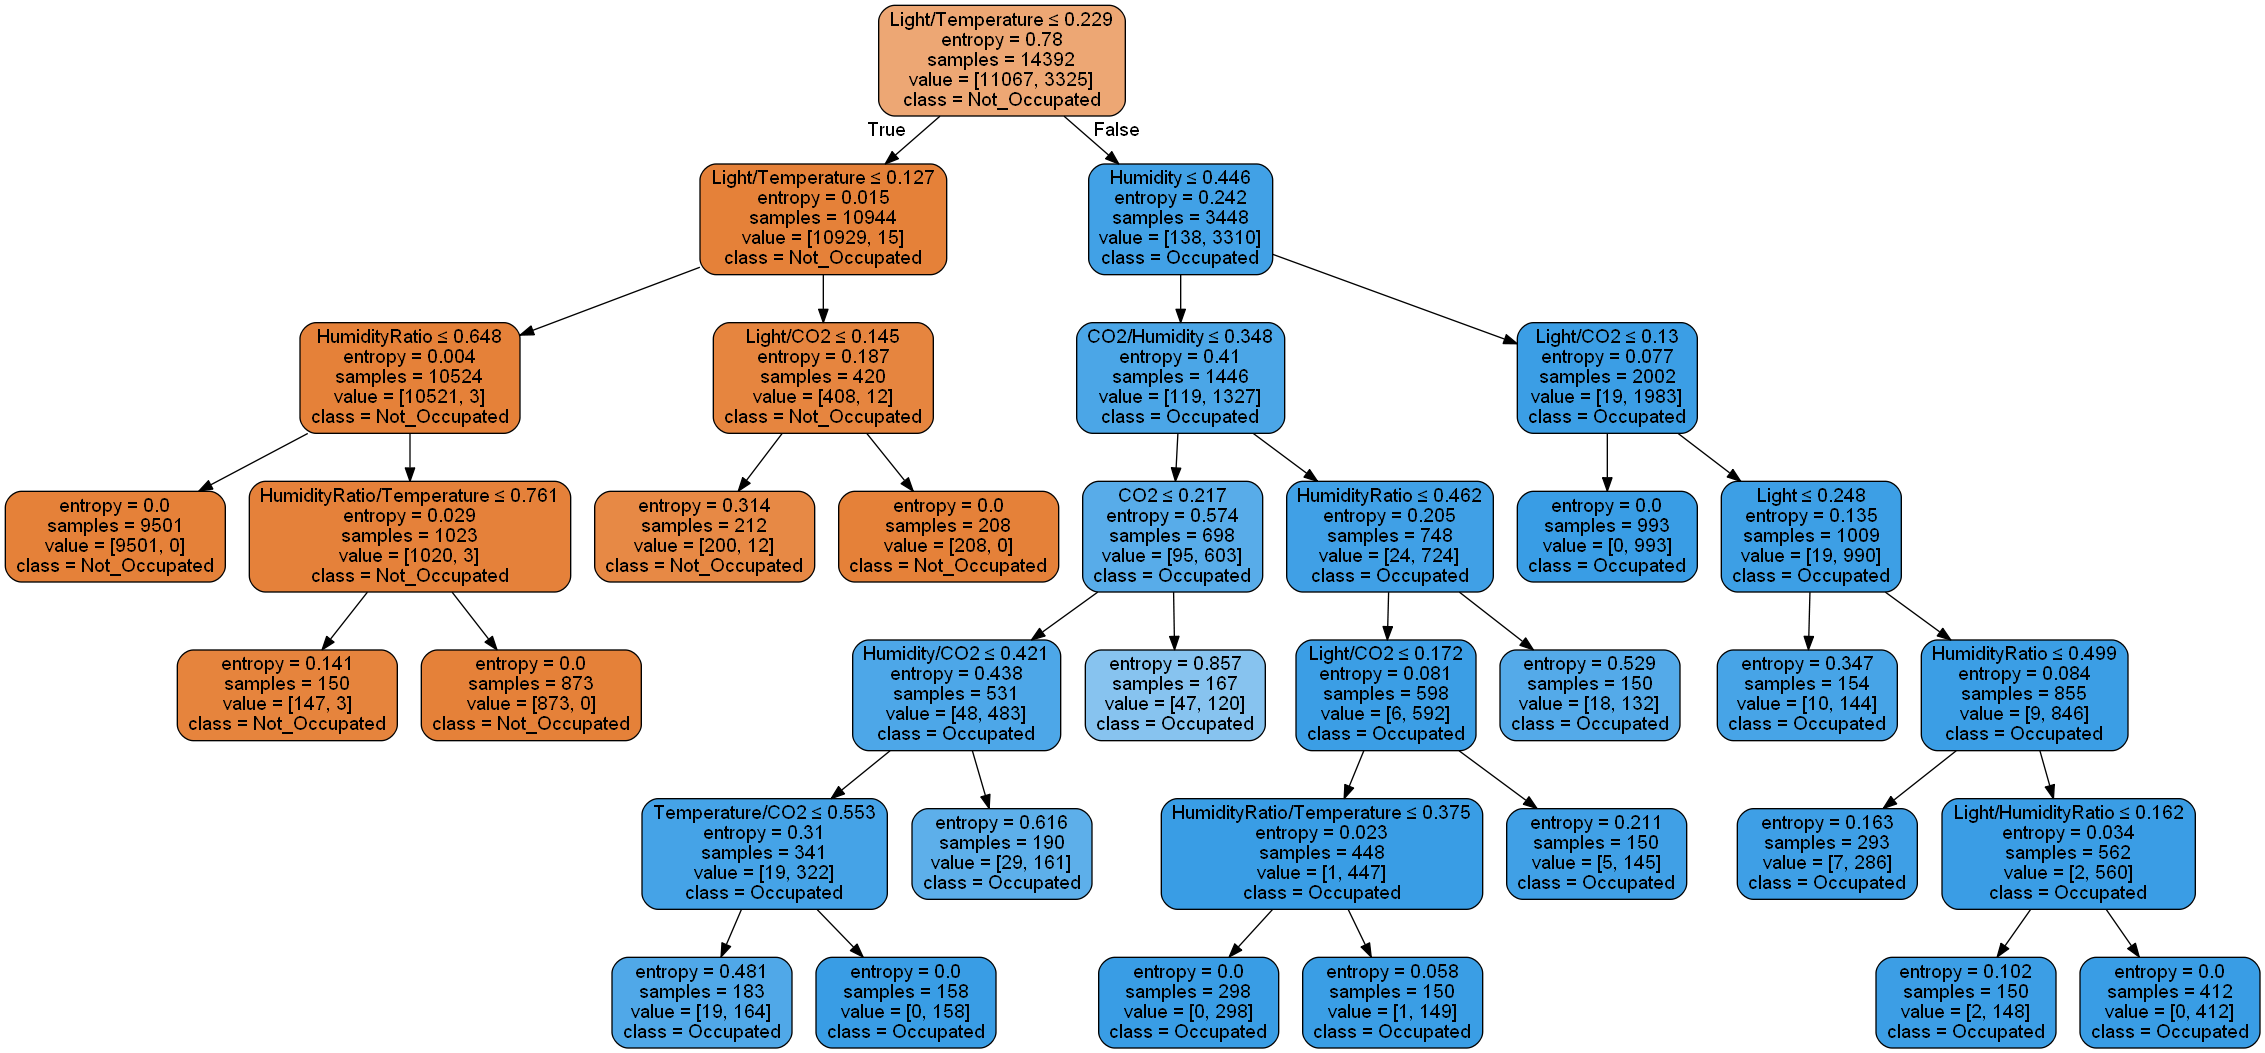

In [41]:
dot_data = tree.export_graphviz(clf_3, out_file=None,
                                feature_names=attributes,
                                class_names=['Not_Occupated' if x == 0 else 'Occupated' for x in clf_3.classes_], 
                                rounded=True,  
                                special_characters=True,filled=True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

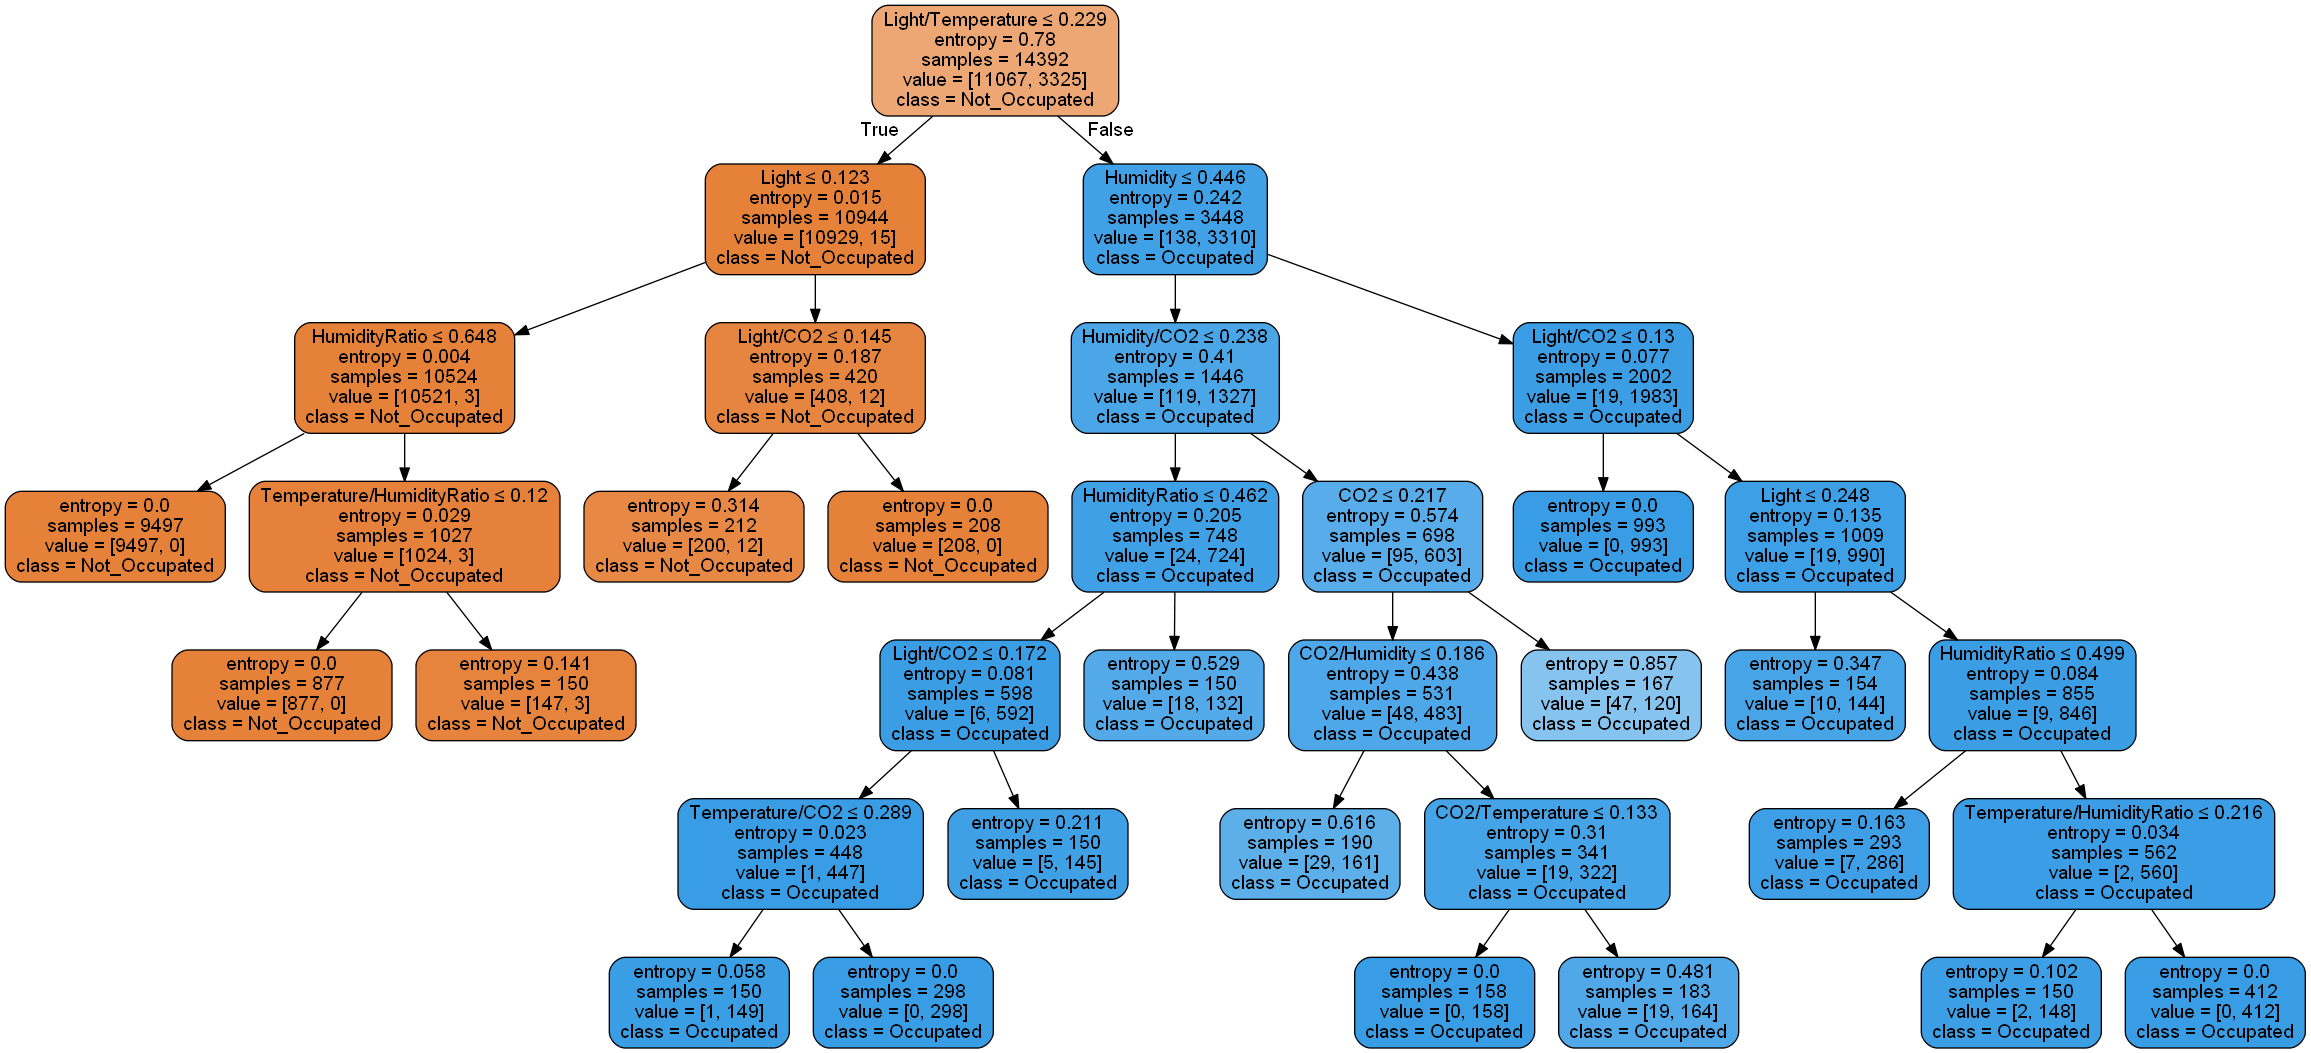

In [42]:
dot_data = tree.export_graphviz(clf_1, out_file=None,
                                feature_names=attributes,
                                class_names=['Not_Occupated' if x == 0 else 'Occupated' for x in clf_1.classes_], 
                                rounded=True,  
                                special_characters=True,filled=True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<Figure size 576x360 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

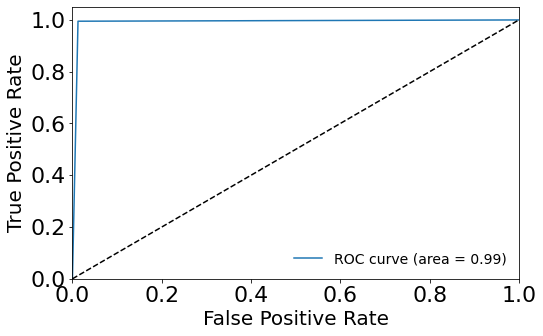

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(fpr_1, tpr_1, label='ROC curve (area = %0.2f)' % (roc_auc_1))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [35]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

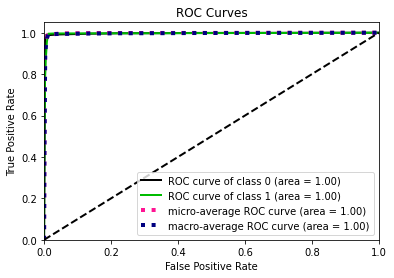

In [44]:
y_score_1 = clf_1.predict_proba(X_test)
plot_roc(y_test, y_score_1)
plt.show()

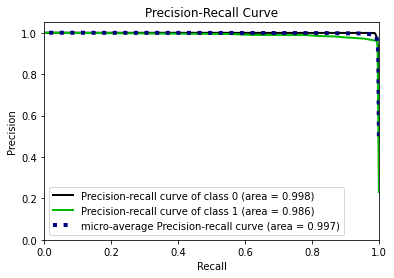

In [45]:
plot_precision_recall(y_test, y_score_1)
plt.show()

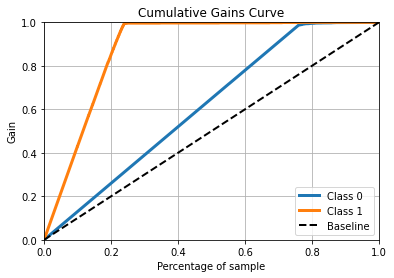

In [46]:
plot_cumulative_gain(y_test, y_score_1)
plt.show()

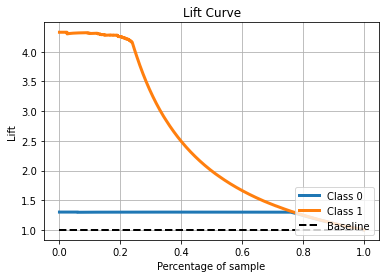

In [47]:
plot_lift_curve(y_test, y_score_1)
plt.show()